# 이미지 PCA
~~~
사람의 얼굴 분석하기
~~~

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
faces_all=fetch_olivetti_faces()

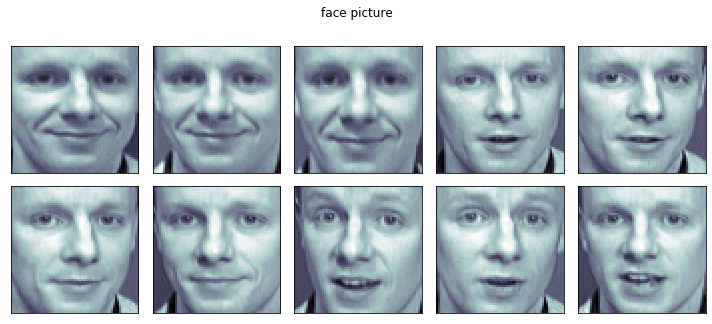

In [5]:
k=20
faces=faces_all.images[faces_all.target==k]       # target: (필수) 종속 변수 ndarray 배열
                                                   #종속변수 배열 값이 20인 images를 호출?????

N=2
M=5
fig=plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)      #현재 배치된 subplot들의 위치를 조절
#left, bottom= 0: 경계에 둔다, right, top= 1: 또 다른 경계에 둔다
#hspace, wspace: subplot이 여러 개일때 subplot간의 간격 의미.

for i in range(N):
    for j in range(M):
        k=i*M+j
        ax=fig.add_subplot(N, M, k+1)             #분할 된 화면 의미 (이게 없으면 그림 사라짐)
        ax.imshow(faces[k], cmap=plt.cm.bone)          #cm은 colormap으로 색을 조절
        ax.grid(False)            #모둔 종이 같은 선 없애기
        ax.xaxis.set_ticks([])    #tick없에기?? (틀의 축에 눈금이 생기는 것)
        ax.yaxis.set_ticks([])

plt.suptitle('face picture')
plt.tight_layout()                  #여백 조절하기 (일부 여백을 제거하는 기능, 공백을 적절하게 배치)
plt.show()

### 이 사진을 주성분이 2개인 PCA 분석을 한 결과:

In [11]:
from sklearn.decomposition import PCA
pca3=PCA(n_components=2)          # n_components=2는 주성분이 2개 인 것을 의미하는 것 같음
X3=faces_all.data[faces_all.target==k]  
W3=pca3.fit_transform(X3)         #특징행렬을 낮은 차원의 근사행렬로 변환
X32=pca3.inverse_transform(W3)    #근사행렬을 원해의 차원으로 복귀

### 주성분 분석으로 근사화한 이미지

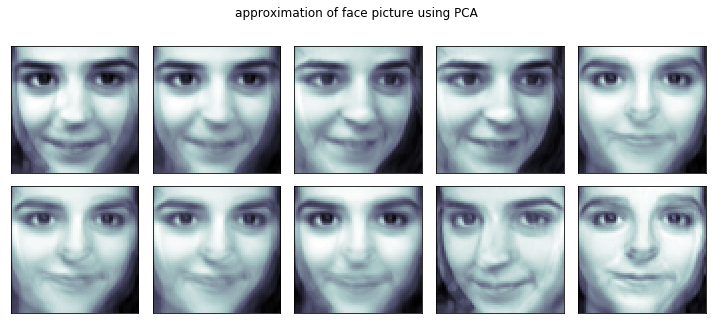

In [13]:
N=2
M=5

fig=plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i in range(N):
    for j in range(M):
        k=i*M+j
        ax=fig.add_subplot(N, M, k+1)             #분할 된 화면 의미 (이게 없으면 그림 사라짐)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)          #cm은 colormap으로 색을 조절
        ax.grid(False)              #모둔 종이 같은 선 없애기
        ax.xaxis.set_ticks([])       #tick없에기?? (틀의 축에 눈금이 생기는 것)
        ax.yaxis.set_ticks([])

plt.suptitle('approximation of face picture using PCA')        #주성분분석으로 근사화한 얼굴 이미지
plt.tight_layout()                  #여백 조절하기 (일부 여백을 제거하는 기능, 공백을 적절하게 배치)
plt.show()

~~~
이 얼굴들은 모두 평균값과 2개의 주성분 얼굴이 각기 다른 선형조합. 
평균값과 2개의 주성분이 나타내는 얼굴을 이미지로 표현하면 다음과 같다. 
주성분이 나타내는 얼굴을 아이겐페이스(Eigen Face)라고 한다
~~~

Text(0.5, 1.0, 'main principle 2')

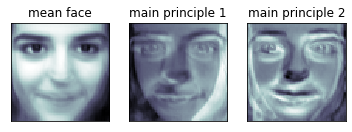

In [15]:
face_mean=pca3.mean_.reshape(64, 64)
face_p1=pca3.components_[0].reshape(64, 64)
face_p2=pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)     #cm은 colormap을 의미하며 색을 지정??
plt.grid(False)    #모눈 종이 같은 것 없앰
plt.xticks([])
plt.yticks([])            #눈금 없앰
plt.title('mean face')    #평균 얼굴

plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])                   #눈금 없앰
plt.title('main principle 1')    #주성분 1

plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])                   #눈금 없앰
plt.title('main principle 2')    #주성분 2

**주성분 얼굴이 각각 어떤 의미를 가지는지 알지 못하니 평균 얼굴에 주성분 얼굴을 더한 모습을 그리기**
### 1) 평균 얼굴에 첫 번째 주성분 더하기
~~~
결론: 왼쪽과 오른쪽에서 바라본 얼굴 이미지의 차이를 나타냄
~~~

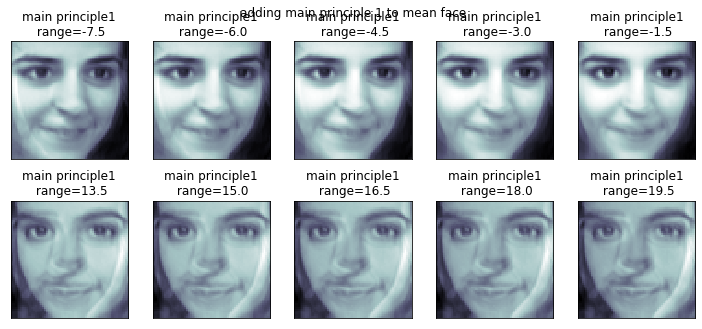

In [25]:
N=2
M=5

fig=plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0.5, wspace=0.5)    #top을 늘리면 두 사진이 겹쳐짐

for i in range(N):
    for j in range(M):
        k=i*M+j
        ax=fig.add_subplot(N, M, k+1)             #분할 된 화면 의미 (이게 없으면 그림 사라짐)
        
        w=1.5*(k-5) if k<5 else 1.5*(k--4)
        ax.imshow(face_mean+w*face_p1, cmap=plt.cm.bone)          #cm은 colormap으로 색을 조절
        
        ax.grid(False)              #모둔 종이 같은 선 없애기
        ax.xaxis.set_ticks([])       #tick없에기?? (틀의 축에 눈금이 생기는 것)
        ax.yaxis.set_ticks([])
        plt.title('main principle1\n range={}'.format(w))

plt.suptitle('adding main principle 1 to mean face')        #주성분분석으로 근사화한 얼굴 이미지
plt.tight_layout()                  #여백 조절하기 (일부 여백을 제거하는 기능, 공백을 적절하게 배치)
plt.show()

### 2) 평균 얼굴에 2번째 주성분 더하기
~~~
결론: 두 번째 주성분을 미소짓는 얼굴과 그렇지 않은 얼굴 이미지 차이를 나타냄
~~~

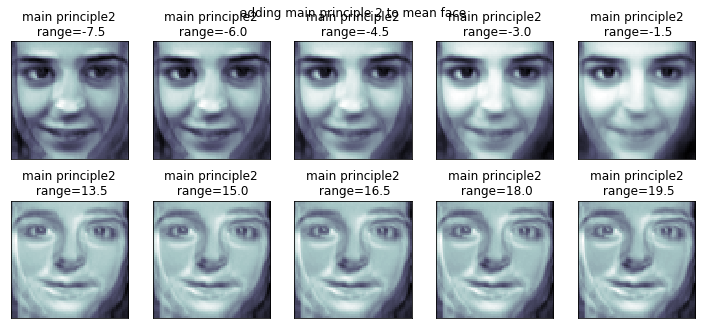

In [26]:
N=2
M=5

fig=plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0.5, wspace=0.5)    #top을 늘리면 두 사진이 겹쳐짐

for i in range(N):
    for j in range(M):
        k=i*M+j
        ax=fig.add_subplot(N, M, k+1)             #분할 된 화면 의미 (이게 없으면 그림 사라짐)
        
        w=1.5*(k-5) if k<5 else 1.5*(k--4)
        ax.imshow(face_mean+w*face_p2, cmap=plt.cm.bone)          #cm은 colormap으로 색을 조절
        
        ax.grid(False)              #모둔 종이 같은 선 없애기
        ax.xaxis.set_ticks([])       #tick없에기?? (틀의 축에 눈금이 생기는 것)
        ax.yaxis.set_ticks([])
        plt.title('main principle2\n range={:.1f}'.format(w))

plt.suptitle('adding main principle 2 to mean face')        #주성분분석으로 근사화한 얼굴 이미지
plt.tight_layout()                  #여백 조절하기 (일부 여백을 제거하는 기능, 공백을 적절하게 배치)
plt.show()